In [1]:
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("data/coffeeshops.csv")
df = df.drop_duplicates()

In [3]:
len(df)

2352

In [4]:
df.name.value_counts()

starbucks                     248
the coffee bean & tea leaf     64
mister donut                   62
macao imperial tea             38
bo's coffee                    27
                             ... 
tea amo                         1
kurimi milk tea bar             1
house of tea                    1
milk + tea station              1
omg bake and tea                1
Name: name, Length: 1376, dtype: int64

In [5]:
len(df)

313

In [5]:
df.describe()

Unnamed: 0          lat          lng
count  2352.000000  2352.000000  2352.000000
mean   1460.075255    14.602515   121.039953
std     957.630728     0.068256     0.037358
min       0.000000    14.388262   120.952987
25%     662.750000    14.559268   121.017278
50%    1314.500000    14.608272   121.040145
75%    2061.250000    14.649281   121.061958
max    3381.000000    14.751989   121.130045

In [6]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True, popup = folium.Popup(row["name"], parse_html=True)).add_to(basemap)

basemap

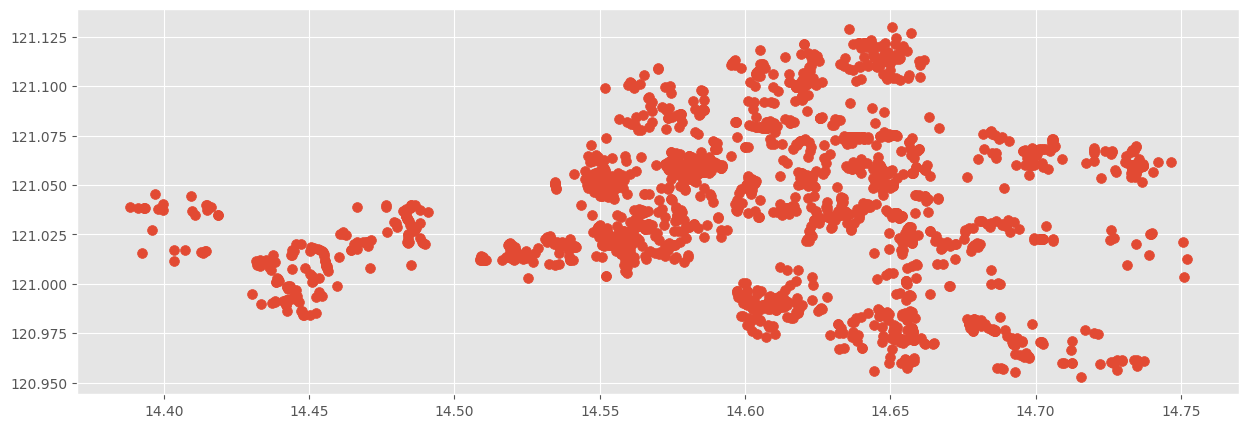

In [7]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [33]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

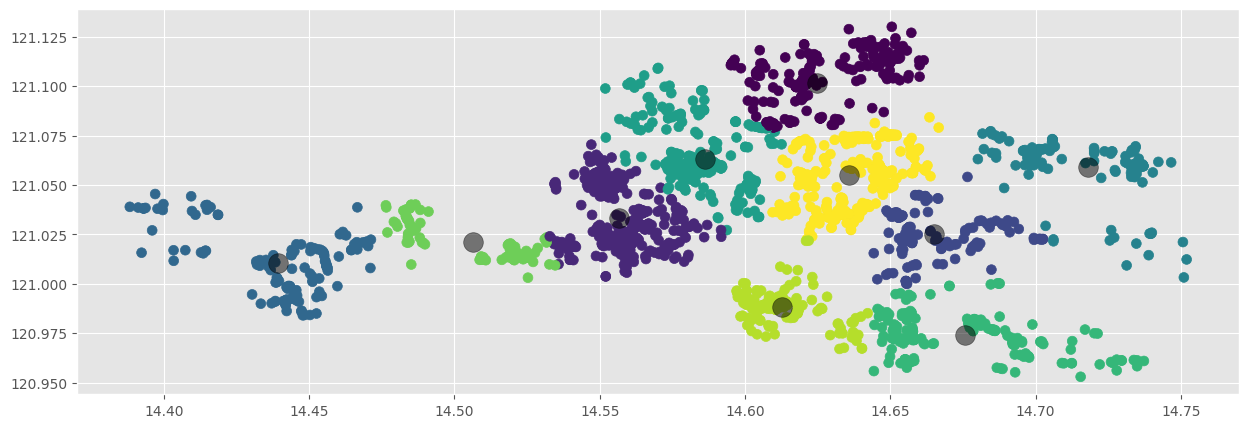

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [35]:
df["cluster"] = y_kmeans

In [36]:
df

Unnamed: 0                        id                            name        lat         lng  cluster    color
0              0  50582e7be4b092540b45419a            j.co donuts & coffee  14.733404  121.060136        4  #fab0e4
1              1  5312cb21498e14478618f0b1           seattle's best coffee  14.737076  121.059460        4  #fab0e4
2              2  4d8afddc6daeb60c50e36fe0   antonio's coffee and bibingka  14.734140  121.056764        4  #fab0e4
3              3  4d567c849e508cfa671a0e9b              forza coffee house  14.732926  121.066557        4  #fab0e4
4              4  58af954037318105ddb97c35                     bo's coffee  14.736220  121.060460        4  #fab0e4
...          ...                       ...                             ...        ...         ...      ...      ...
2347        3374  5b65271667a9fe002c9b865a                       oh my tea  14.645327  121.060930        9  #ff9f9b
2348        3378  4f994da0e4b06ffc4684e465           dainee's tea & sweets  14.640550  121.061293        9  #ff9f9b
2349        3379  5d08722d356b49002c8cfd85                       tipsy tea  14.639935  121.061180        9  #ff9f9b
2350        3380  604ca29acf9d6c183ccce25c                omg bake and tea  14.639440  121.061373        9  #ff9f9b
2351        3381  62f85518ee6483471cacc0cd  discussions coffee & tea house  14.663478  121.084251        9  #ff9f9b

[2352 rows x 7 columns]

In [37]:
palette = sns.color_palette("pastel", 10).as_hex()
palette

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0']

In [38]:
color_getter = lambda x: palette[int(x)]
df["color"] = df["cluster"].map(color_getter)
df.head()

Unnamed: 0                        id                           name        lat         lng  cluster    color
0           0  50582e7be4b092540b45419a           j.co donuts & coffee  14.733404  121.060136        4  #d0bbff
1           1  5312cb21498e14478618f0b1          seattle's best coffee  14.737076  121.059460        4  #d0bbff
2           2  4d8afddc6daeb60c50e36fe0  antonio's coffee and bibingka  14.734140  121.056764        4  #d0bbff
3           3  4d567c849e508cfa671a0e9b             forza coffee house  14.732926  121.066557        4  #d0bbff
4           4  58af954037318105ddb97c35                    bo's coffee  14.736220  121.060460        4  #d0bbff

In [42]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodb positron", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
        popup = folium.Popup(row["name"], parse_html=True),
        fill_color=row["color"]).add_to(basemap)    

basemap

In [31]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

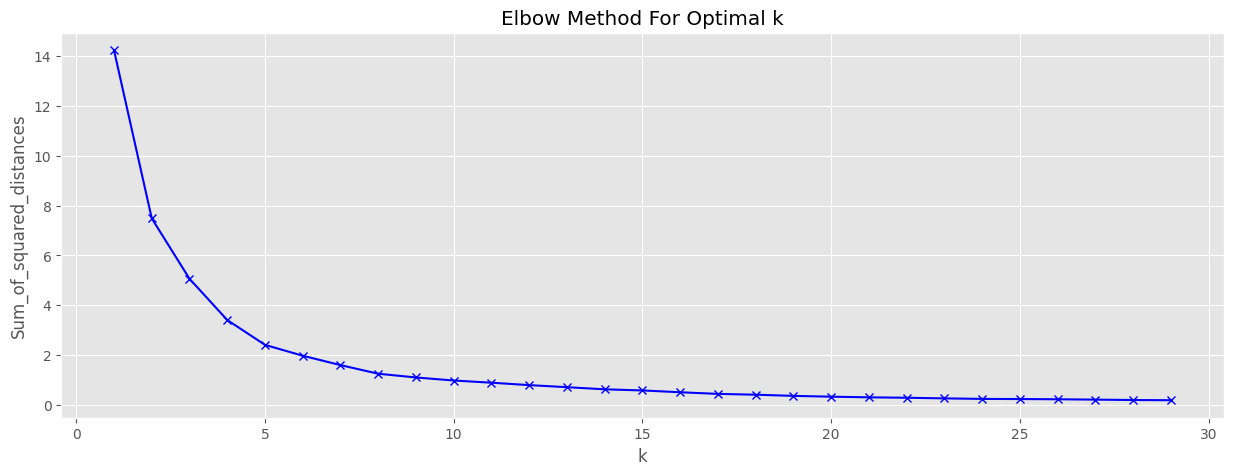

In [32]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()